In [2]:
import pandas as pd
import pymc3 as pm
import numpy as np
import statistics
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r'C:\Users\khalil\BDA HW 5\WaffleDivorce.csv')
df.dropna()
df.tail()

,Location,Loc,Population,MedianAgeMarriage,Marriage,Marriage.SE,Divorce,Divorce.SE,WaffleHouses,South,Slaves1860,Population1860,PropSlaves1860
45,Virginia,VA,8.00,26.4,20.5,0.83,8.9,0.52,40,1,490865,1219630,0.400
46,Washington,WA,6.72,25.9,21.4,1.00,10.0,0.65,0,0,0,11594,0.000
47,West Virginia,WV,1.85,25.0,22.2,1.69,10.9,1.34,4,1,18371,376688,0.049
48,Wisconsin,WI,5.69,26.3,17.2,0.79,8.3,0.57,0,0,0,775881,0.000
49,Wyoming,WY,0.56,24.2,30.7,3.92,10.3,1.90,0,0,0,0,0.000


In [4]:
def standardize(series):
    std_series = (series - series.mean())/series.std()
    return std_series

In [8]:
df["Divorce"] = standardize(df["Divorce"])
df["Marriage"] = standardize(df["Marriage"])
df["MedianAgeMarriage"] = standardize(df["MedianAgeMarriage"])
df["MedianAgeMarriage"].std()

1.0

In [14]:
with pm.Model()  as m_5_3:
    a  = pm.Normal("a" , 0, 0.2)
    bA = pm.Normal("bA", 0, 0.5)
    bM = pm.Normal("bM", 0, 0.5)

    mu = pm.Deterministic("mu", a + bM * df["Marriage"] + bA * df["MedianAgeMarriage"] )
    sigma = pm.Exponential("Sigma", 1)

    divorce_rate = pm.Normal("divorce_rate", mu=mu, sigma=sigma, observed=df["Divorce"].values)
    prior_samples = pm.sample_prior_predictive()
    m_5_3_trace = pm.sample()


        


C:\Users\khalil\anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\khalil\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\khalil\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\khalil\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Sigma, bM, bA, a]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 254 seconds.


Text(0, 0.5, 'Divorce Rate')

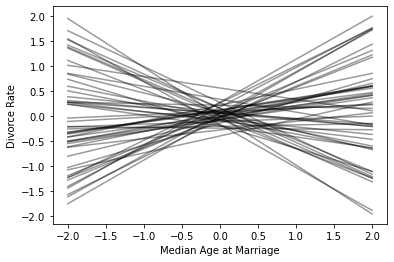

In [15]:
fig,ax = plt.subplots()
x = np.linspace(-2,2,50)
for a,bA in zip(prior_samples["a"][:50], prior_samples["bA"][:50]):
    y = a +bA*x
    ax.plot(x,y, c="black", alpha=0.4)

plt.xlabel('Median Age at Marriage')
plt.ylabel('Divorce Rate')


Text(0, 0.5, 'Divorce Rate')

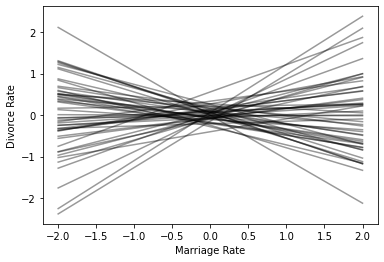

In [23]:
fig,ax = plt.subplots()
x = np.linspace(-2,2,50)
for a,bM in zip(prior_samples["a"][:50], prior_samples["bM"][:50]):
    y = a +bM*x
    ax.plot(x,y, c="black", alpha=0.4)

plt.xlabel('Marriage Rate')
plt.ylabel('Divorce Rate')


